In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
!ls ../ex1

computeCost.m          ex1data2.txt           normalEqn.m
computeCostMulti.m     featureNormalize.m     plotData.m
ex1.m                  gradientDescent.m      submit.m
ex1_multi.m            gradientDescentMulti.m warmUpExercise.m
ex1data1.txt           lib


In [3]:
DATA = '../ex1'

In [4]:
!head -5 $DATA/ex1data1.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233


In [5]:
data = pd.read_csv(f'{DATA}/ex1data1.txt', header=None, names=['X', 'y'])
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
X = pd.DataFrame(data['X'])
y = data['y']

In [7]:
m = len(y)
m

97

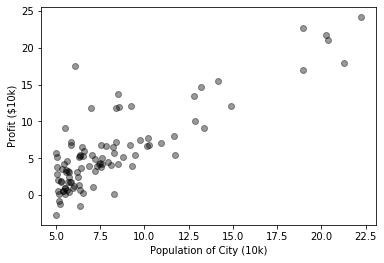

In [8]:
plt.plot(X, y, 'ko', alpha=0.4)
plt.xlabel('Population of City (10k)')
plt.ylabel('Profit ($10k)');

In [9]:
X['bias'] = 1
X = X[['bias', 'X']]
X.head()

,bias,X
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [10]:
theta = np.zeros((2, 1))
theta

array([[0.],
       [0.]])

In [16]:
def predict(X, theta):
    return (X.values @ theta).reshape(-1)

In [17]:
def compute_cost(preds, y):
    m = len(y)
    return ((preds - y) ** 2).sum() / (2*m)

In [18]:
preds = predict(X, theta)
compute_cost(preds, y)

32.072733877455676

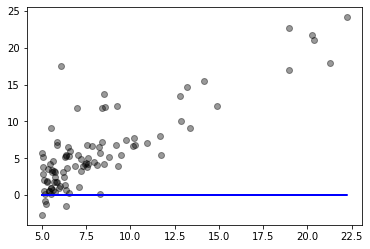

In [19]:
plt.plot(X['X'], y, 'ko', alpha=0.4)
plt.plot(X['X'], preds, 'b-');

In [20]:
def update(X, theta, preds, learning_rate=0.01):
    m = len(preds)
    theta = (
        theta - ((learning_rate / m) * ((preds - y) * X.T).sum(axis=1)).values.reshape(-1, 1))
    return theta

In [21]:
theta1 = update(X, theta, preds)
theta1

array([[0.05839135],
       [0.6532885 ]])

In [22]:
preds1 = predict(X, theta1)
compute_cost(preds1, y)

6.737190464870007

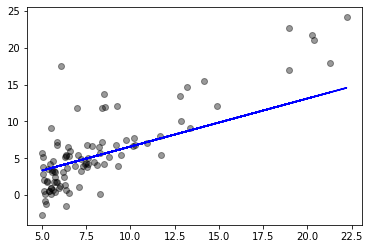

In [24]:
plt.plot(X['X'], y, 'ko', alpha=0.4)
plt.plot(X['X'], preds1, 'b-');

In [27]:
def optimize(X, y, learning_rate=0.01, max_iter=1500, plot=True):
    losses = []
    if plot:
        plt.plot(X['X'], y, 'ko', alpha=0.4)
    theta = np.zeros((2, 1))
    for i in range(max_iter):
        preds = predict(X, theta)
        cost = compute_cost(preds, y)
        losses.append(cost)
        if i % 50 == 0:
            print('cost:', cost)
        if plot:
            plt.plot(X['X'], preds, 'b-', alpha=0.2);
            if i == (max_iter - 1): # final solution
                plt.plot(X['X'], preds, 'r-');
        theta = update(X, theta, preds, learning_rate=learning_rate)
    return theta, losses

cost: 32.072733877455676
cost: 17.368818097687328
cost: 10.927691822782238
cost: 8.105309971200318
cost: 6.867783124972814
cost: 6.32435632712908
cost: 6.084917710369948
cost: 5.978615268587341
cost: 5.930623262136702
cost: 5.9081712724061015
cost: 5.8969072791317405
cost: 5.890545718079149
cost: 5.886333781322502
cost: 5.883065854291868
cost: 5.880213925707182
cost: 5.87754674501575
cost: 5.874963029942466
cost: 5.8724184186636315
cost: 5.869893478041623
cost: 5.867379692625498
cost: 5.864873328443665
cost: 5.862372745612414
cost: 5.859877221375508
cost: 5.857386434646807
cost: 5.854900240262359
cost: 5.85241857011265
cost: 5.84994138984282
cost: 5.847468679889222
cost: 5.845000427174259
cost: 5.842536621469061


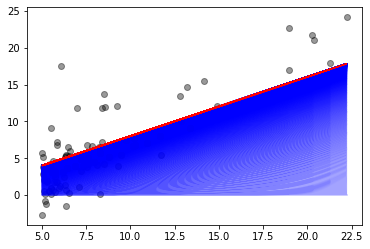

In [32]:
theta, history = optimize(X, y, learning_rate=0.0001)

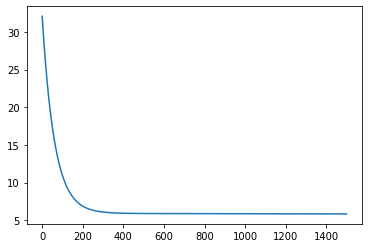

In [33]:
plt.plot(history);